In [1]:
# pip install numpy, pandas, scikit-learn, matplotlib, yfinance

Import the necessary libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Load historical stock price data into a Pandas DataFrame. We will be using the library yfinance to fetch stock data:

In [3]:
import yfinance as yf

# Replace 'AAPL' with the stock symbol you want to predict
stock_symbol = 'TSLA'

# Download historical stock data  yyyy-mm-dd
data = yf.download(stock_symbol, start='2023-08-25', end='2023-09-25')

# Extract the closing prices
df = data[['Close']].copy()


[*********************100%%**********************]  1 of 1 completed


Create features and target variable:

In [4]:
# Create a new column for the target variable (next day's closing price)
df['Target'] = df['Close'].shift(-1)

# Drop the last row with NaN target
df.dropna(inplace=True)

# Create a feature matrix (X) and target vector (y)
X = df[['Close']].values
y = df['Target'].values

Split the data into training and testing sets:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Create and train a linear regression model:

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Make predictions:

In [7]:
y_pred = model.predict(X_test)

Visualize the results:

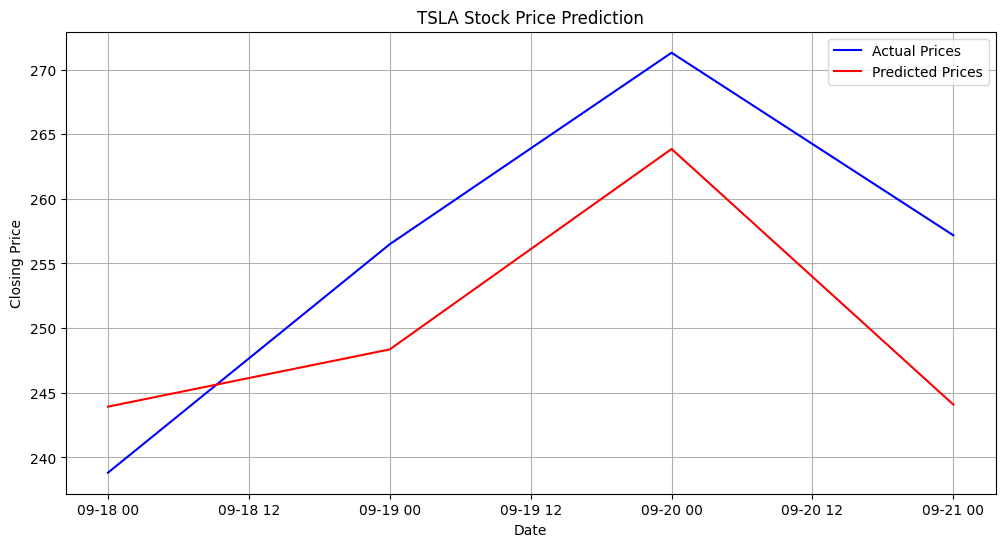

In [8]:
plt.figure(figsize=(12, 6))
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(df.index[-len(y_test):], y_test, label='Actual Prices', color='b')
plt.plot(df.index[-len(y_test):], y_pred, label='Predicted Prices', color='r')
plt.legend()
plt.grid(True)
plt.show()

Leveraging natural language processing for daily news analysis to derive insights for predicting stock price movements.

In [9]:
#pip install requests

In [10]:
import pandas as pd

# Load the API keys from the CSV file
api_keys_df = pd.read_csv('C:\\Users\\julie\\Documents\\Personal\\Archive\\api_keys.csv')

# Filter the API key for the specific service (e.g., "News API")
service_name = 'News API'
api_key = api_keys_df.loc[api_keys_df['Service'] == service_name, 'API_Key'].values[0]

Make sure you have created a valid API key from the News API website (https://newsapi.org/). If you haven't done so, sign up for an account and generate a new API key.

Replace 'YOUR_NEWS_API_KEY' with your actual News API key in the following line of your code:

If you meet KeyError: 'articles', print(news_data) to check if its due to the api plan you have.

In [11]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import requests

nltk.download('vader_lexicon')

# Initialize NLP tools
nlp = SentimentIntensityAnalyzer()

# Replace 'YOUR_NEWS_API_KEY' with your actual News API key
news_api_key = api_key
stock_symbol = 'TSLA'  # Replace with the stock symbol you want to analyze
date_from = '2023-08-25'  # Replace with the start date yyyy-mm-dd
date_to = '2023-09-25'    # Replace with the end date

# Define the News API endpoint URL
url = f'https://newsapi.org/v2/everything?q={stock_symbol}&from={date_from}&to={date_to}&language=en&sortBy=relevancy&apiKey={news_api_key}'

# Fetch news articles
response = requests.get(url)
news_data = response.json()

# Analyze sentiment for each news article
sentiments = []
for article in news_data['articles']:
    sentiment = nlp.polarity_scores(article['title'])  # You can also analyze the article content
    sentiments.append(sentiment)

# Calculate the average sentiment score for the day's news
average_sentiment = sum(sentiment['compound'] for sentiment in sentiments) / len(sentiments)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\julie\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Update the Feature Matrix (X) and Target Vector (y):

You already have historical stock price data loaded in the df DataFrame. You can update the X and y variables to include the sentiment feature. Ensure that you have the 'Close' price as one of the features, and add the sentiment as another feature.

In [12]:
# Create a new feature for sentiment
df['Sentiment'] = average_sentiment

# Update the feature matrix (X) and target vector (y)
X = df[['Close', 'Sentiment']].values
y = df['Target'].values

Split the Data into Training and Testing Sets:

As you've done previously, split the data into training and testing sets to evaluate your model's performance.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Create and Train a Model:

Choose a machine learning model for stock price prediction. You can start with a regression model like Linear Regression, but you might also explore more advanced models such as Decision Trees, Random Forests, or even time series forecasting models like ARIMA or LSTM for better accuracy. Train the chosen model on the training data.

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Make Predictions:

Use the trained model to make predictions on the testing data.

In [15]:
y_pred = model.predict(X_test)

Evaluate the Model:

Assess the model's performance using appropriate evaluation metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R2) to understand how well the model predicts stock prices.

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error: 79.77849949579118
Root Mean Squared Error: 8.931881072640364
Mean Absolute Error: 8.444787459385289
R-squared (R2): 0.3988771766914818


Visualize the Results:

Plot the actual vs. predicted stock prices to visualize how well your model is performing.

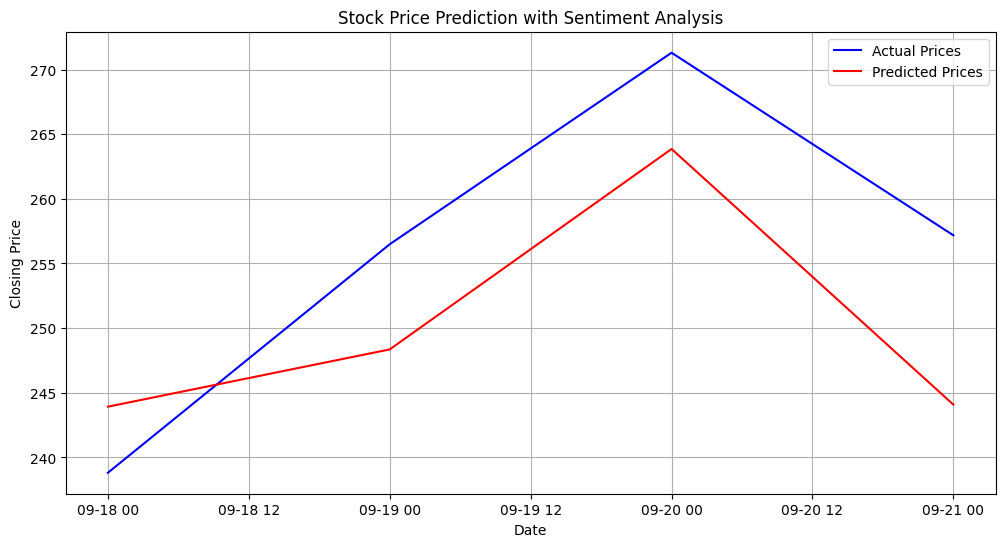

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.title('Stock Price Prediction with Sentiment Analysis')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(df.index[-len(y_test):], y_test, label='Actual Prices', color='b')
plt.plot(df.index[-len(y_test):], y_pred, label='Predicted Prices', color='r')
plt.legend()
plt.grid(True)
plt.show()

Find Local Maxima:

You can use a simple algorithm to find local maxima in your historical stock price data. A local maximum is a price point where the price is higher than its neighboring points. You can define a window size and slide it over your price data to identify local maxima within that window.

This code will give you a list of tuples, where each tuple contains the index and value of a local maximum.

In [18]:
import numpy as np

def find_local_maxima(prices, window_size=5):
    local_maxima = []

    for i in range(window_size, len(prices) - window_size):
        if prices[i] > max(prices[i - window_size:i]) and prices[i] > max(prices[i + 1:i + window_size + 1]):
            local_maxima.append((i, prices[i]))

    return local_maxima

# Example usage:
local_maxima = find_local_maxima(df['Close'].values)

Select the Most Relevant Resistance Level:

Once you have identified local maxima, you can choose one or more of them as potential resistance levels. You might want to select the most recent or the most significant local maximum as your resistance level. You can add additional criteria for selecting the resistance level, such as requiring it to be significant or to have been tested multiple times.

For example, you can select the most recent local maximum as the resistance level:

In [19]:
if local_maxima:
    resistance_level_index, resistance_level = local_maxima[-1]
else:
    resistance_level = None

Add the Resistance Line to the Plot:

Finally, you can add the selected resistance level to your stock price prediction plot, as shown in the previous response:

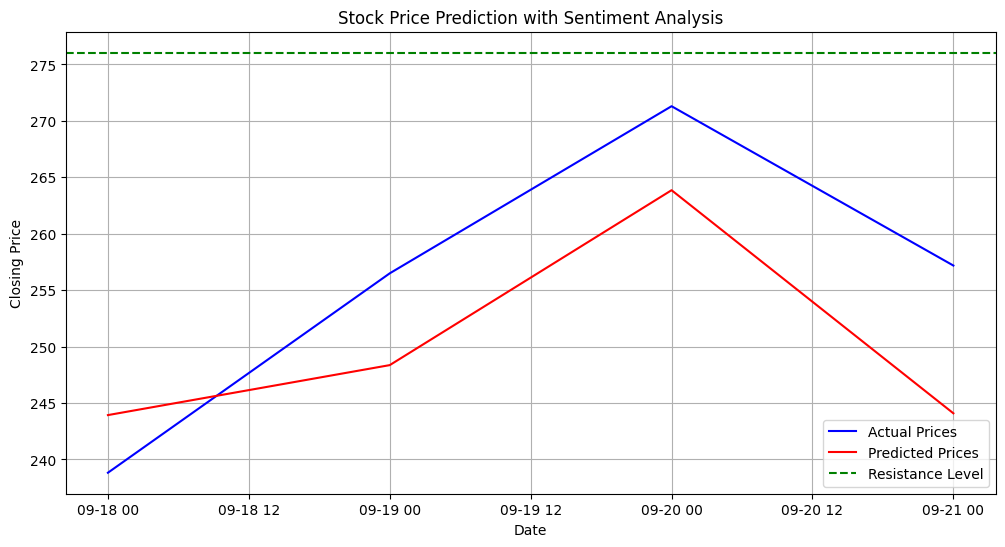

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.title('Stock Price Prediction with Sentiment Analysis')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(df.index[-len(y_test):], y_test, label='Actual Prices', color='b')
plt.plot(df.index[-len(y_test):], y_pred, label='Predicted Prices', color='r')

# Add the resistance line
if resistance_level is not None:
    plt.axhline(y=resistance_level, color='g', linestyle='--', label='Resistance Level')

plt.legend()
plt.grid(True)
plt.show()

Define a future date range for which you want to make predictions. This will be a range of dates that come after your historical data.

In [30]:
import pandas as pd

# Define the start and end dates for the forecast
forecast_start_date = '2023-09-26'  # Replace with your desired start date
forecast_end_date = '2023-09-30'    # Replace with your desired end date

# Create a date range for the forecast
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date)

Use your trained model to make predictions for the forecasted dates. You'll need to prepare the feature data for these dates. You can use the last available data point in your historical data as a starting point for the forecast.

In [31]:
# Get the last available closing price in your historical data
last_known_price = df['Close'].iloc[-1]

# Create a list to store the forecasted prices
forecasted_prices = []

# Iterate over the forecast dates and use the model to predict each day's price
for date in forecast_dates:
    # Create a feature vector for the current date (use last known price and sentiment)
    feature_vector = np.array([last_known_price, average_sentiment]).reshape(1, -1)

    # Use the model to predict the price for the current date
    forecasted_price = model.predict(feature_vector)
    
    # Append the forecasted price to the list
    forecasted_prices.append(forecasted_price[0])

    # Update the last known price for the next iteration
    last_known_price = forecasted_price[0]

Visualize the forecasted prices along with the historical data and the resistance line:

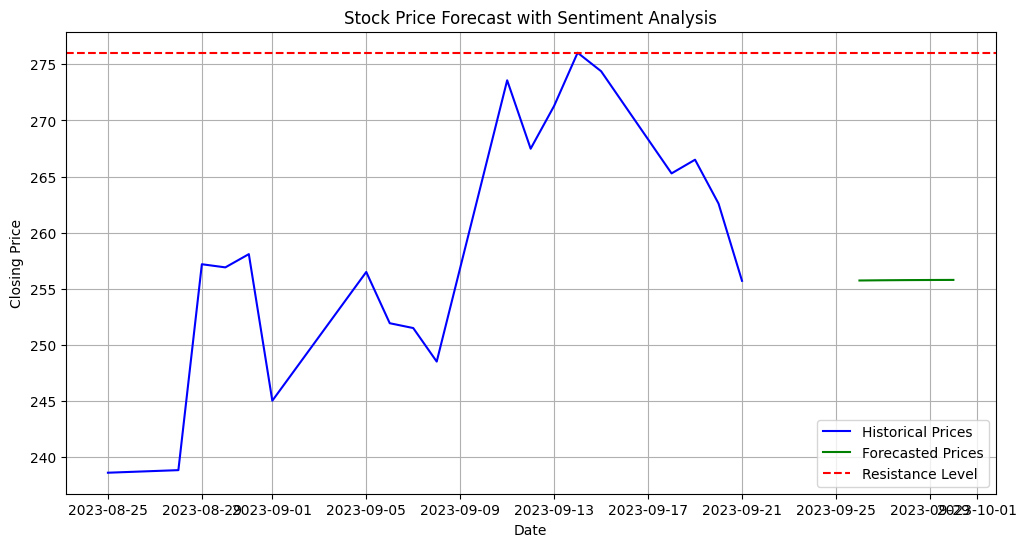

In [32]:
# Create a DataFrame for the forecasted prices
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted Price': forecasted_prices})
forecast_df.set_index('Date', inplace=True)

# Plot historical and forecasted prices
plt.figure(figsize=(12, 6))
plt.title('Stock Price Forecast with Sentiment Analysis')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(df.index, df['Close'], label='Historical Prices', color='b')
plt.plot(forecast_df.index, forecast_df['Forecasted Price'], label='Forecasted Prices', color='g')

# Add the resistance line
if resistance_level is not None:
    plt.axhline(y=resistance_level, color='r', linestyle='--', label='Resistance Level')

plt.legend()
plt.grid(True)
plt.show()